<a href="https://colab.research.google.com/github/mchbrn/forgerai/blob/master/forgerai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **forgerai**

### Access Dataset

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Import Libraries

In [32]:
from matplotlib import pyplot as plt
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPool2D
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import numpy as np
import os
import time
import tensorflow as tf

### Genuine Handwriting

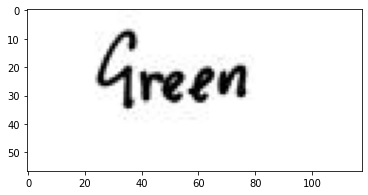

In [33]:
img_forgee = image.load_img("/content/drive/My Drive/dataset/training/forgee/2057.jpg")
plt.imshow(img_forgee)

### Fradulent Handwriting

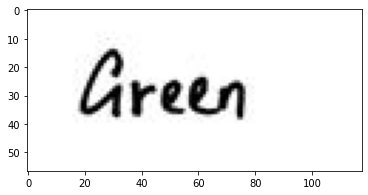

In [34]:
img_forger = image.load_img("/content/drive/My Drive/dataset/training/forger/3257.jpg")
plt.imshow(img_forger)

### Image Dimensions

In [35]:
cv2.imread("/content/drive/My Drive/dataset/training/forger/80.jpg").shape

(57, 118, 3)

### Rescale Images

In [36]:
train = ImageDataGenerator(rescale=1/255)
validate = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

### Generate Label Data Automatically from Directory Structure

In [37]:
dataset_train = train.flow_from_directory("/content/drive/My Drive/dataset/training/",
                                          target_size=(57,118),
                                          color_mode="grayscale",
                                          batch_size=32,
                                          class_mode='binary',
                                          shuffle=True)

dataset_validate = validate.flow_from_directory("/content/drive/My Drive/dataset/validating/",
                                          target_size=(57,118),
                                          color_mode="grayscale",
                                          batch_size=32,
                                          class_mode='binary',
                                          shuffle=True)

dataset_test = test.flow_from_directory("/content/drive/My Drive/dataset/testing/",
                                          target_size=(57,118),
                                          color_mode="grayscale",
                                          batch_size=32,
                                          class_mode='binary',
                                          shuffle=True)

Found 6000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 1360 images belonging to 2 classes.


### Classifications

In [38]:
dataset_train.class_indices

{'forgee': 0, 'forger': 1}

In [39]:
dataset_validate.class_indices

{'forgee': 0, 'forger': 1}

In [40]:
dataset_test.class_indices

{'forgee': 0, 'forger': 1}

In [41]:
dataset_train.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [42]:
dataset_validate.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [43]:
dataset_test.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

### Setup Visualisations

In [44]:
%load_ext tensorboard
NAME = "forgerai_64-128-256_{}".format(int(time.time()))
tensorboard = TensorBoard(log_dir="../forgerai/logs/{}".format(NAME))

### Build Convolutional Neural Network

In [45]:
model = Sequential()
model.add(Conv2D(64, (3,3), strides=(1,1), activation="relu", input_shape=(57,118,1)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(128, (3,3), strides=(1,2), activation="relu", input_shape=(57,118,1)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(256, (3,3), strides=(2,2), activation="relu", input_shape=(57,118,1)))
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dense(2, activation="softmax"))

In [46]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 55, 116, 64)       640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 27, 58, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 25, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 14, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 5, 6, 256)         295168    
_________________________________________________________________
flatten_1 (Flatten)          (None, 7680)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)              

### Compile and Train the Neural Net

In [47]:
model.compile(optimizer="adam",
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])

model_fit = model.fit(dataset_train,
                      batch_size=64,
                      epochs=10,
                      validation_data=dataset_validate,
                      callbacks=[tensorboard])

IndentationError: ignored

### Evaluate Model on Test Data

In [ ]:
results = model.evaluate(dataset_test, batch_size=64)
print("Test loss: ", results[0])
print("Test accuracy", results[1])

43/43 [==============================] - 227s 5s/step - loss: 0.6723 - accuracy: 0.6015
Test loss, test accuracy:  0.6723219156265259


In [ ]:
results[1]

0.6014705896377563

In [ ]:
model.save("/content/drive/My Drive/forgerai/model2")

INFO:tensorflow:Assets written to: /content/drive/My Drive/forgerai/assets
